# Visualisation du BER pour le RNN

## 1. Importation des modules

In [1]:
from CC import *
from math import erfc
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from datetime import datetime

## 2. Récupération du modèle

In [6]:
from tensorflow.keras.models import load_model

model = load_model("rnnCCRNN.keras")

model.summary ()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 100, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 128)       │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100, 128)       │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100, 128)       │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100, 1)         │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,349 (786.52 KB)

 Trainable params: 66,945 (261.50 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 133,892 (523.02 KB)

## 3. Définition des paramètres

In [7]:
batch = 1000  # taille du batch
trame = 1000  # taille trame 
Eb = 1  # energie d'un bit
Code_Rate = 1/2  # rendement du code
Ec = Eb*Code_Rate
snr11 = linspace (0, 11, 12)
rnn = [0 for k in range (8)]
t = [0.5 * erfc (np.sqrt (10**(k/10))) for k in snr11]
Viterbi = [0.1, 0.04, 0.012, 0.003, 0.00061, 0.000091, 0.0000095, 0.0000006, 0.00000002, 0.0000000003]
turboabs = [0.8, 0.9, 1, 1.1, 1.2, 1.3]
turboord = [0.0015, 0.0009, 0.0004, 0.0001, 0.00003, 0.00001]
Multi = [0.088846, 0.050519, 0.029531, 0.013019, 0.00408, 0.001759, 0.000636, 0.000202, 0.000101, 0.00003]
ViaGRU = [8*10**-2, 5*10**-2, 2*10**-2, 6*10**-3, 1.8*10**-3, 3.2*10**-4, 7*10**-5, 1.6*10**-5]
ComGRU = [2*10**-1, 10**-1, 3.5*10**-2, 9*10**-3, 2*10**-3, 3.5*10**-4, 4*10**-5]
Viterbi1 = [0.091107, 0.039920, 0.014904, 0.003694, 0.000664, 0.000094, 1.012*10**-5, 1.66*10**-6]

Viterbi2_100 = [0.08890, 0.04613, 0.018436, 0.00576, 0.0014, 0.000301, 5.9e-05, 1.3e-05]
Viterbi2_1000 = [0.08956, 0.04517, 0.01789, 0.00515, 0.0011, 0.000173, 2.24*10**-5, 2.14*10**-6]
Viterbi2_10000 = [0.09154, 0.0459, 0.01806, 0.00508, 0.001099, 0.0001696, 1.76e-05, 2.16e-06]

## 4. Monte Carlo

In [8]:
for i in range (len (rnn)):
    nombre_erreur = 0
    nombre_bits = 0
    
    while nombre_erreur < 1000 and nombre_bits < 40*10**6 :
        
        Y = rd.randint (0, 2, (batch, trame, 1))
        N0 = 10**(-snr11[i]/10)
        bruit = np.sqrt (N0/2) * np.random.randn(len(Y), trame, 2)
        X = (-2 * np.array([cc2(h) for h in Y]) + 1) * np.sqrt(Ec) + bruit
        
        predictions = model.predict (X, verbose = 1)
        
        nombre_erreur += np.sum(Y != (predictions > 0.5).astype(int))
        nombre_bits += trame*batch

    print(f"Étape {i} : erreurs accumulées = {nombre_erreur}, bits traités = {nombre_bits}, BER = {nombre_erreur/nombre_bits}")
    rnn[i] = nombre_erreur/nombre_bits


print ("done")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step
Étape 0 : erreurs accumulées = 88971, bits traités = 1000000, BER = 0.088971
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step
Étape 1 : erreurs accumulées = 46647, bits traités = 1000000, BER = 0.046647
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step
Étape 2 : erreurs accumulées = 19544, bits traités = 1000000, BER = 0.019544
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
Étape 3 : erreurs accumulées = 6510, bits traités = 1000000, BER = 0.00651
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
Étape 4 : erreurs accumulées = 1464, bits traités = 1000000, BER = 0.001464
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
Étape 5 : erreurs accumulées = 1205, bits traités = 5000000, BER = 0.000241
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step
32/32 ━━━━━━━━━━━━━━━━

## 5. Tracer des courbes

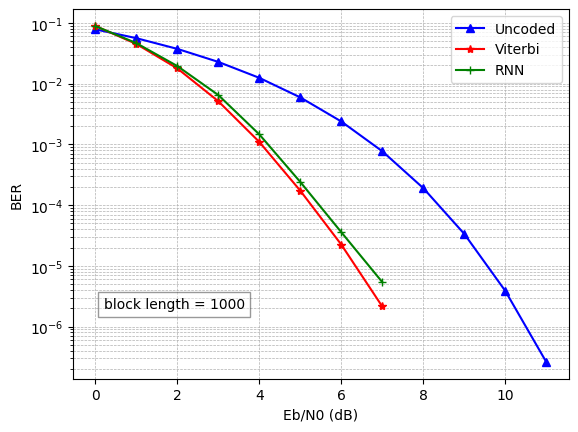

In [9]:
plt.plot (snr11, t, 'b^-', label = "Uncoded")
plt.plot (snr11[:8], Viterbi2_1000, 'r*-', label = "Viterbi")
plt.plot (snr11[:8], rnn, 'g+-', label = "RNN")  # Courbe RNN
#plt.plot (turboabs, turboord, 'm+-', label = "Turbo Code  757")
#plt.title ("Comparaison des codes correcteurs")
plt.text(0.2, 2*10**-6, f"block length = {trame}", fontsize=10, bbox=dict(facecolor='white', alpha=0.4))
plt.legend ()
plt.xlabel ("Eb/N0 (dB)")
plt.ylabel ("BER")
plt.yscale ("log")
plt.grid (True)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
#plt.savefig(f"Courbes/RNN/47c{datetime.now().strftime('%H%M')}.png", dpi=300)
plt.show ()

In [30]:
Y = rd.randint (0, 2, (10000, 100, 1))
N0 = 10**(-snr11[2]/10)
bruit = np.sqrt (N0/2) * np.random.randn(len(Y), 100, 2)
X = (-2 * np.array([cc2(h) for h in Y]) + 1) * np.sqrt(Ec) + bruit

In [31]:
model.evaluate (X, Y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9812 - loss: 0.0536


[0.05344976857304573, 0.9809958934783936]